<a href="https://colab.research.google.com/github/jyoti612/self_driving_car/blob/main/self_driving_car_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from itertools import islice
from scipy import pi
import numpy as np
import pandas as pd

In [ ]:
data_folder = './driving_dataset/driving_dataset'
data_folder

'./driving_dataset/driving_dataset'

In [ ]:
train_file =os.path.join(data_folder,'data.txt')
split = 0.8
x=[]
y=[]
with open(train_file) as fp:
    for line in islice(fp,None):
        path, angle = line.strip().split()
        full_path = os.path.join(data_folder, path)
    
        x.append(full_path)
        y.append(float(angle)*pi/100)
y = np.array(y)

In [ ]:
y

array([0.        , 0.        , 0.        , ..., 0.06974336, 0.06974336,
       0.        ])

In [ ]:
x

['./driving_dataset/driving_dataset\\0.jpg',
 './driving_dataset/driving_dataset\\1.jpg',
 './driving_dataset/driving_dataset\\2.jpg',
 './driving_dataset/driving_dataset\\3.jpg',
 './driving_dataset/driving_dataset\\4.jpg',
 './driving_dataset/driving_dataset\\5.jpg',
 './driving_dataset/driving_dataset\\6.jpg',
 './driving_dataset/driving_dataset\\7.jpg',
 './driving_dataset/driving_dataset\\8.jpg',
 './driving_dataset/driving_dataset\\9.jpg',
 './driving_dataset/driving_dataset\\10.jpg',
 './driving_dataset/driving_dataset\\11.jpg',
 './driving_dataset/driving_dataset\\12.jpg',
 './driving_dataset/driving_dataset\\13.jpg',
 './driving_dataset/driving_dataset\\14.jpg',
 './driving_dataset/driving_dataset\\15.jpg',
 './driving_dataset/driving_dataset\\16.jpg',
 './driving_dataset/driving_dataset\\17.jpg',
 './driving_dataset/driving_dataset\\18.jpg',
 './driving_dataset/driving_dataset\\19.jpg',
 './driving_dataset/driving_dataset\\20.jpg',
 './driving_dataset/driving_dataset\\21.jpg'

In [ ]:
len(y)

45406

In [ ]:
split_index = int(split*len(y))

In [ ]:
train_y = y[:split_index]
test_y = y[split_index:]

In [ ]:
import matplotlib.pyplot as plt


(array([  26.,   12.,   23.,   23.,   16.,   25.,    7.,    4.,    7.,
           3.,    3.,    5.,    4.,    4.,    4.,    5.,    5.,   17.,
          18.,   21.,   67.,   41.,   17.,   19.,   15.,   15.,   16.,
          24.,   25.,  152.,  280.,  126.,  325.,  759., 2609.,  944.,
        1806.,  727.,  245.,  258.,  132.,   30.,   20.,   53.,   75.,
          46.,    6.,    4.,    5.,    9.]),
 array([-5.02434913, -4.87773728, -4.73112544, -4.58451359, -4.43790175,
        -4.2912899 , -4.14467806, -3.99806621, -3.85145436, -3.70484252,
        -3.55823067, -3.41161883, -3.26500698, -3.11839513, -2.97178329,
        -2.82517144, -2.6785596 , -2.53194775, -2.3853359 , -2.23872406,
        -2.09211221, -1.94550037, -1.79888852, -1.65227667, -1.50566483,
        -1.35905298, -1.21244114, -1.06582929, -0.91921744, -0.7726056 ,
        -0.62599375, -0.47938191, -0.33277006, -0.18615821, -0.03954637,
         0.10706548,  0.25367732,  0.40028917,  0.54690102,  0.69351286,
         0.84012

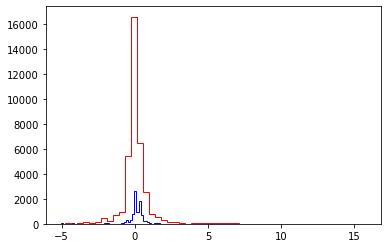

In [ ]:
plt.hist(train_y,color = 'red' ,bins = 50,histtype = 'step')
plt.hist(test_y,color = 'blue' ,bins = 50,histtype = 'step')

In [ ]:
train_mean_y = np.mean(train_y)

In [ ]:
train_mean_y

0.062277974822901046

In [ ]:
np.mean(np.square(test_y - train_mean_y))

0.6192510707709883

In [ ]:
np.mean(np.square(test_y ))

0.6184869809073972

In [ ]:
import cv2
import random
import numpy as np

xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

#read data.txt
with open("./driving_dataset/driving_dataset/data.txt") as f:
    for line in f:
        xs.append('./driving_dataset/driving_dataset' + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * 3.14159265 / 180)

#get number of images
num_images = len(xs)

#shuffle list of images
c = list(zip(xs, ys))
random.shuffle(c)
xs, ys = zip(*c)

train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = ys[-int(len(xs) * 0.2):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(cv2.resize(cv2.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], (200, 66)) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(cv2.resize(cv2.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], (200, 66)) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


In [ ]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.core.protobuf import saver_pb2
import driving_data
import model

LOGDIR = './save'

sess = tf.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(model.y_, model.y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
sess.run(tf.global_variables_initializer())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V2)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times
for epoch in range(epochs):
  for i in range(int(driving_data.num_images/batch_size)):
    xs, ys = driving_data.LoadTrainBatch(batch_size)
    train_step.run(feed_dict={model.x: xs, model.y_: ys, model.keep_prob: 0.8})
    if i % 10 == 0:
      xs, ys = driving_data.LoadValBatch(batch_size)
      loss_value = loss.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
      print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

    # write logs at every iteration
    summary = merged_summary_op.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
    summary_writer.add_summary(summary, epoch * driving_data.num_images/batch_size + i)

    if i % batch_size == 0:
      if not os.path.exists(LOGDIR):
        os.makedirs(LOGDIR)
      checkpoint_path = os.path.join(LOGDIR, "model.ckpt")
      filename = saver.save(sess, checkpoint_path)
  print("Model saved in file: %s" % filename)

print("Run the command line:\n" \
      "--> tensorboard --logdir=./logs " \
      "\nThen open http://0.0.0.0:6006/ into your web browser")


C:\Users\Jyoti\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


AttributeError: module 'driving_data' has no attribute 'num_images'